In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install matplotlib==3.3.4
!pip install keras_ocr==0.8.6

     |████████████████████████████████| 11.5 MB 4.5 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 56 kB 2.2 MB/s 
     |████████████████████████████████| 9.5 MB 9.8 MB/s 
     |████████████████████████████████| 895 kB 61.3 MB/s 
     |████████████████████████████████| 603 kB 52.4 MB/s 
     |████████████████████████████████| 50 kB 6.0 MB/s 
  Created wheel for keras-ocr: filename=keras_ocr-0.8.6-py3-none-any.whl size=42937 sha256=7ecfbf61a3ad217b8419daa7ce685bc077d7454a5281510d0e95ebbbbe3f9355
  Stored in directory: /root/.cache/pip/wheels/19/24/38/2253a2935d4a46d2aedcbcfb9e0cf39ed77140f21e23b83fef
Successfully built keras-ocr


In [7]:
import os
import math
import imgaug
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection
import tensorflow as tf
import PIL
import PIL.Image
import keras_ocr

In [2]:
detector = keras_ocr.detection.Detector()

Looking for /root/.keras-ocr/craft_mlt_25k.h5


In [3]:
detector.model.load_weights(os.path.join("/content/drive/MyDrive/Kaino_ocr_finetuning/weights", 'detector_icdar2013.h5'))

In [4]:
recognizer = keras_ocr.recognition.Recognizer()

Looking for /root/.keras-ocr/crnn_kurapan.h5


In [5]:
recognizer.model.load_weights(os.path.join("/content/drive/MyDrive/Kaino_ocr_finetuning/weights", 'recognizer_borndigital.h5'))

In [6]:
pipeline = keras_ocr.pipeline.Pipeline(detector=detector, recognizer=recognizer)

In [13]:
file_paths = [
        '/content/drive/MyDrive/Kaino-Image Segmentation/images/pageClearion - filtration tank (drawings)3.jpg',
    ]
images = [
    keras_ocr.tools.read(url) for url in file_paths
    ]

In [14]:
predictions = pipeline.recognize(images)

/usr/local/lib/python3.7/dist-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


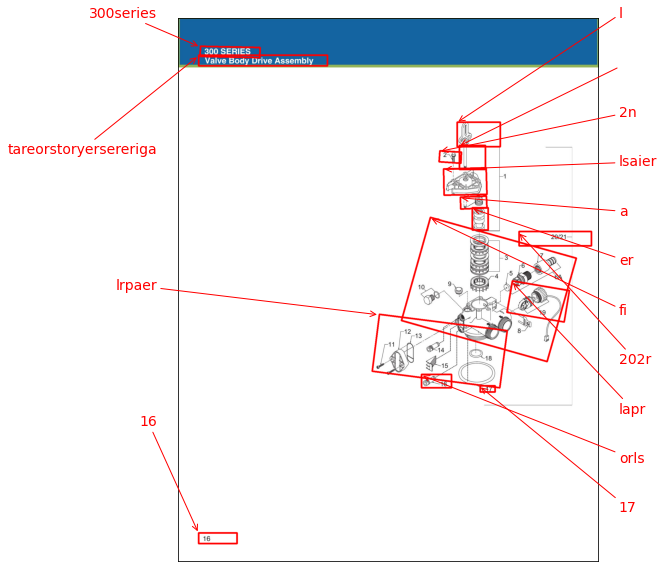

In [15]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(10, 10))

if(len(images) == 1):
  for image, prediction in zip(images, predictions):
    keras_ocr.tools.drawAnnotations(image=image, predictions=prediction, ax=axs)
else:
  for ax, image, prediction in zip(axs, images, predictions):
    keras_ocr.tools.drawAnnotations(image=image, predictions=prediction, ax=ax)